In [3]:
import pandas as pd
import datetime

In [4]:
turnstile_data = pd.concat([
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt'),    #june 1, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt'),    #june 8, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt'),    #june 15, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt'),    #june 22, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt'),    #june 29, 2019

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt'),    #july 6, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190713.txt'),    #july 13, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190720.txt'),    #july 20, 2019
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190727.txt'),    #july 27, 2019

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt'),    #june 2, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180609.txt'),    #june 9, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180616.txt'),    #june 16, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180623.txt'),    #june 23, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt'),    #june 30, 2018
                       
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180707.txt'),    #july 7, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180714.txt'),    #july 14, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180721.txt'),    #july 21, 2018
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180728.txt'),    #july 28, 2018

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt'),    #june 3, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt'),    #june 10, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt'),    #june 17, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt'),    #june 24, 2017

                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170701.txt'),    #july 1, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170708.txt'),    #july 8, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170715.txt'),    #july 15, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170722.txt'),    #july 22, 2017
                       pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170729.txt'),    #july 29, 2017
                       ])

In [5]:


df060119 = turnstile_data

df060119.rename(columns=lambda x: x.strip(), inplace=True) # strip the white space for each column

df060119['datetime'] = df060119['DATE'].str.cat(df060119['TIME'],sep=" ")

df060119['TURNSTILE_ID'] = df060119['STATION'] + '-' + df060119['C/A'] + '-' + df060119['UNIT'] + '-' + df060119['SCP']

df060119.sort_values(['TURNSTILE_ID','datetime'],inplace = True)

#df060119.drop('DATE', axis=1, inplace=True)
#df060119.drop('TIME', axis=1, inplace=True)

df060119.reset_index(drop= True,inplace = True)


In [6]:
df060119['ac_entries'] = df060119['ENTRIES'].diff() # do subtraction to get the real entries number # 
df060119['ac_exits'] = df060119['EXITS'].diff() # do subtraction to get the real exits number

In [10]:
df060119.describe() # check the statistics of the dataframe

,ENTRIES,EXITS,ac_entries,ac_exits
count,5.405519e+06,5.405519e+06,5.405518e+06,5.405518e+06
mean,4.048916e+07,3.290394e+07,-2.723033e+00,-3.043391e+00
std,2.099989e+08,1.916148e+08,5.662509e+07,4.826536e+07
min,0.000000e+00,0.000000e+00,-2.116996e+09,-2.108758e+09
25%,4.440680e+05,1.952975e+05,6.000000e+00,5.000000e+00
50%,2.436994e+06,1.366476e+06,8.900000e+01,5.800000e+01
75%,6.840620e+06,4.734020e+06,3.390000e+02,2.340000e+02
max,2.130465e+09,2.124055e+09,2.121879e+09,2.120286e+09


In [7]:
Q3 = 2.190000e+02
Q1 = 8.000000e+00

IQR = Q3-Q1

upper_bound = Q3+2*IQR 

lower_bound = Q1-2*IQR

possible_outlier_len = len(df060119[df060119.ac_entries < lower_bound])+len(df060119[df060119.ac_entries > upper_bound])

outlier_perc = possible_outlier_len/len(df060119)

In [8]:
d = df060119[df060119.ac_entries > lower_bound]
df = d[d.ac_entries < upper_bound]

In [11]:
df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,TURNSTILE_ID,ac_entries,ac_exits
1,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,04:00:00,REGULAR,14719444,16451172,05/25/2019 04:00:00,1 AV-H007-R248-00-00-00,0.0,0.0
2,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,08:00:00,REGULAR,14719444,16451172,05/25/2019 08:00:00,1 AV-H007-R248-00-00-00,0.0,0.0
3,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,12:00:00,REGULAR,14719444,16451173,05/25/2019 12:00:00,1 AV-H007-R248-00-00-00,0.0,1.0
4,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,16:00:00,REGULAR,14719444,16451173,05/25/2019 16:00:00,1 AV-H007-R248-00-00-00,0.0,0.0
5,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,20:00:00,REGULAR,14719444,16451173,05/25/2019 20:00:00,1 AV-H007-R248-00-00-00,0.0,0.0
7,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,04:00:00,REGULAR,13569755,15200616,05/26/2018 04:00:00,1 AV-H007-R248-00-00-00,88.0,235.0
8,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,08:00:00,REGULAR,13569834,15200917,05/26/2018 08:00:00,1 AV-H007-R248-00-00-00,79.0,301.0
9,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,12:00:00,REGULAR,13570342,15201709,05/26/2018 12:00:00,1 AV-H007-R248-00-00-00,508.0,792.0
11,H007,R248,00-00-00,1 AV,L,BMT,05/26/2018,20:00:00,REGULAR,13571652,15203771,05/26/2018 20:00:00,1 AV-H007-R248-00-00-00,616.0,1036.0
13,H007,R248,00-00-00,1 AV,L,BMT,05/26/2019,04:00:00,REGULAR,14719444,16451173,05/26/2019 04:00:00,1 AV-H007-R248-00-00-00,0.0,0.0


In [9]:
df.groupby('STATION').ac_entries.sum().sort_values(ascending = False).reset_index()

,STATION,ac_entries
0,34 ST-PENN STA,13916877.0
1,FULTON ST,9654834.0
2,23 ST,8640859.0
3,42 ST-PORT AUTH,8158303.0
4,86 ST,7866832.0
5,125 ST,7853971.0
6,TIMES SQ-42 ST,7208142.0
7,GRD CNTRL-42 ST,6939598.0
8,CANAL ST,6447491.0
9,34 ST-HERALD SQ,5958302.0


#### 

In [12]:
df = df[['STATION','datetime','ac_entries','ac_exits']].copy()

In [ ]:
df_time.head()

In [13]:
df['datetime'] =  pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [14]:
#break TIME into two groups: 1. rush_hour_morning (6am to 10am) 2. rush_hour_evening(4pm to 8pm) 3. regular_hour (10am to 4pm)

rush_hour_morning_df= df.set_index('datetime').between_time('06:00:00','10:00:00')

rush_hour_evening_df = df.set_index('datetime').between_time('16:00:00','20:00:00')

dfregular_hour= df.set_index('datetime').between_time('10:00:01','15:59:59')


In [ ]:
#d = df_rush_hour_morning[df_rush_hour_morning.ac_entries < 7071830] # filter out the corrupted value which is a very big cumulative value at the beginning of the station
#d.sample(5)

In [15]:
m = rush_hour_morning_df.groupby('STATION')['ac_entries'].sum().sort_values(ascending=False)

In [16]:
m.get(key = '34 ST-PENN STA') 

2028351.0

In [17]:
m.get(key = 'FULTON ST') 

1139692.0

In [18]:
m.get(key = '23 ST') 

987570.0

In [19]:
m.get(key = '42 ST-PORT AUTH') 

1630649.0

In [20]:
m.get(key = 'TIMES SQ-42 ST') 

820196.0

In [ ]:
#regular_hour.groupby('STATION')['ac_entries'].sum().sort_values(ascending=False)

In [21]:
e = rush_hour_evening_df.groupby('STATION')['ac_entries'].sum().sort_values(ascending=False)

In [22]:
e.get(key = '34 ST-PENN STA') 

7347951.0

In [23]:
e.get(key = 'FULTON ST') 

3459539.0

In [24]:
e.get(key = '23 ST') 

4078480.0

In [25]:
e.get(key = '42 ST-PORT AUTH') 

3619624.0

In [26]:
e.get(key = 'TIMES SQ-42 ST') 

3711030.0

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

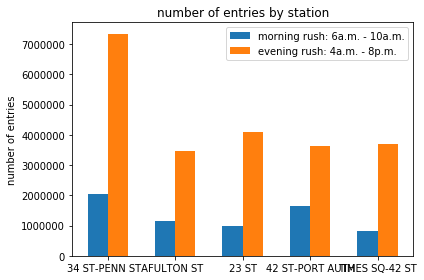

In [33]:
labels = ['34 ST-PENN STA', 'FULTON ST', '23 ST','42 ST-PORT AUTH', 'TIMES SQ-42 ST']
morning_rush = [2028351.0, 1139692.0, 987570.0, 1630649.0, 820196.0]
evening_rush = [7347951.0, 3459539.0, 4078480.0, 3619624.0, 3711030.0]


x = np.arange(len(labels)) 
width = 0.3  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, morning_rush, width, label='morning rush: 6a.m. - 10a.m.')
rects2 = ax.bar(x + width/2, evening_rush, width, label='evening rush: 4a.m. - 8p.m.')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of entries')
ax.set_title('number of entries by station')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

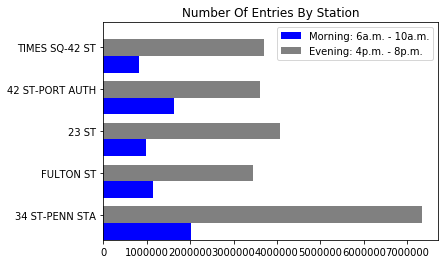

In [43]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df_g = pandas.DataFrame(dict(graph=['34 ST-PENN STA', 'FULTON ST', '23 ST','42 ST-PORT AUTH', 'TIMES SQ-42 ST'],
                           n=[2028351.0, 1139692.0, 987570.0, 1630649.0, 820196.0],
                           m=[7347951.0, 3459539.0, 4078480.0, 3619624.0, 3711030.0])) 

ind = np.arange(len(df_g))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df_g.n, width, color='blue', label='Morning: 6a.m. - 10a.m.')
ax.barh(ind + width, df_g.m, width, color='grey', label='Evening: 4p.m. - 8p.m.')
ax.set_title('Number Of Entries By Station')

ax.set(yticks=ind + width, yticklabels=df_g.graph, ylim=[2*width - 1, len(df_g)])


ax.legend()

plt.show()
